# Setup

In [22]:
from nilearn import datasets
from nilearn import plotting # 3D visualization 
from nilearn import image
from nilearn.connectome import ConnectivityMeasure

import numpy as np
import glob
from pathlib import Path
import matplotlib.pyplot as plt

from pygsp import graphs, filters

# Tuto nilearn about brain graph
example : https://nilearn.github.io/dev/auto_examples/03_connectivity/plot_probabilistic_atlas_extraction.html#sphx-glr-auto-examples-03-connectivity-plot-probabilistic-atlas-extraction-py


In [1]:
# Retrieve the atlas and the data
from nilearn import datasets

atlas = datasets.fetch_atlas_msdl()
# Loading atlas image stored in 'maps'
atlas_filename = atlas["maps"]
# Loading atlas data stored in 'labels'
labels = atlas["labels"]

# Load the functional datasets
data = datasets.fetch_development_fmri(n_subjects=1)

print(
    "First subject resting-state nifti image (4D) is located "
    f"at: {data.func[0]}"
)


Dataset created in C:\Users\INES/nilearn_data\development_fmri


Dataset created in C:\Users\INES/nilearn_data\development_fmri\development_fmri



 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


First subject resting-state nifti image (4D) is located at: C:\Users\INES/nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz


 ...done. (2 seconds, 0 min)


In [5]:
# Extract the time series
from nilearn.input_data import NiftiMapsMasker # transform nifti objects to time series using a probabilistic atlas

masker = NiftiMapsMasker(
    maps_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)
masker.fit(data.func[0])
time_series = masker.transform(data.func[0], confounds=data.confounds)

c:\Users\INES\Documents\3A_MVA\ML4TimesSeries\TimeSeries-GraphSignalProcessing\.venv\lib\site-packages\nilearn\input_data\__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


[NiftiMapsMasker.fit] loading regions from None
Resampling maps
________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x0000021DF48A5CF0>, interpolation='continuous', target_shape=(50, 59, 50), target_affine=array([[   4.,    0.,    0.,  -96.],
       [   0.,    4.,    0., -132.],
       [   0.,    0.,    4.,  -78.],
       [   0.,    0.,    0.,    1.]]))


c:\Users\INES\Documents\3A_MVA\ML4TimesSeries\TimeSeries-GraphSignalProcessing\.venv\lib\site-packages\nilearn\_utils\cache_mixin.py:241: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn(


_____________________________________________________resample_img - 2.6s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract('C:\\Users\\INES/nilearn_data\\development_fmri\\development_fmri\\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'allow_overlap': True,
  'clean_kwargs': {},
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'keep_masked_maps': True,
  'low_pass': None,
  'maps_img': 'C:\\Users\\INES/nilearn_data\\msdl_atlas\\MSDL_rois\\msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': 'zscore_sample',
  'standardize_confounds': 'zscore_sample',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=[ 'C:\\Users\\INES/nilearn_data\\development_fmri\\development_fmri\\sub-pixar123_task-pixar_desc-reducedConfounds

In [9]:
print(time_series.shape)

(168, 39)


In [10]:
report = masker.generate_report(displayed_maps=[2, 6, 7, 16, 21])
report

c:\Users\INES\Documents\3A_MVA\ML4TimesSeries\TimeSeries-GraphSignalProcessing\.venv\lib\site-packages\numpy\ma\core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


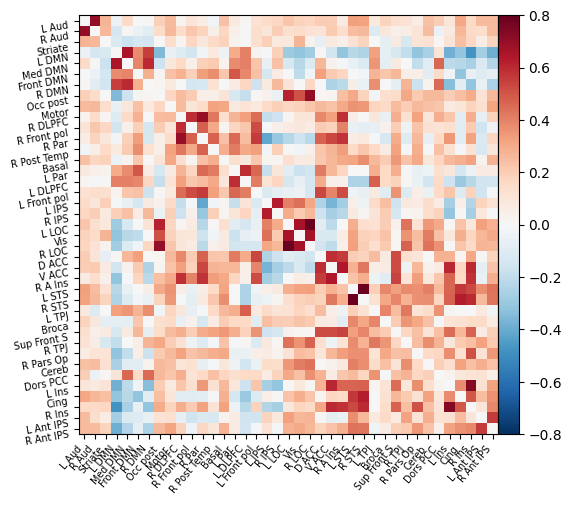

In [13]:
# Build and display a correlation matrix
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample",
)
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Display the correlation matrix
import numpy as np

from nilearn import plotting

# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(
    correlation_matrix, labels=labels, colorbar=True, vmax=0.8, vmin=-0.8
)

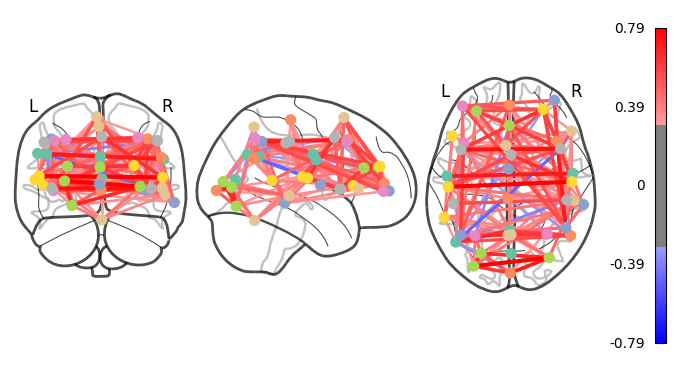

In [14]:
# Display the corresponding graph

coords = atlas.region_coords

# We threshold to keep only the 20% of edges with the highest value
# because the graph is very dense
plotting.plot_connectome(
    correlation_matrix, coords, edge_threshold="80%", colorbar=True
)

plotting.show()

In [15]:
# 3D visualization
view = plotting.view_connectome(
    correlation_matrix, coords, edge_threshold="80%"
)

# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view

# With BOLD5000 dataset

In [3]:
data_dir = Path('__data')
# Download and load the ICBM152 template (dated 2009).
atlas = datasets.fetch_atlas_msdl(data_dir=data_dir) # datasets.fetch_icbm152_2009
# Loading atlas image stored in 'maps'
atlas_filename = atlas["maps"]
# Loading atlas data stored in 'labels'
labels = atlas["labels"]

In [4]:
img_filename = glob.glob(f"{data_dir}/*.nii.gz")
print(img_filename)

['__data\\CSI4_GLMbetas-TYPED-FITHRF-GLMDENOISE-RR_ses-01.nii.gz', '__data\\sub-CSI1_ses-01_task-5000scenes_run-01_bold.nii.gz']


In [11]:
#im = image.smooth_img(img_filename[1], fwhm=None)
#print(im.shape)

im = image.load_img(img_filename[1])
print(im.shape)
image.get_data(im).shape # returns its data
# print(im)

(106, 106, 69, 194)


(106, 106, 69, 194)

In [12]:
#img = image.load_img(img_filename[0])
#print(img)
# retrieve the first volume of the 4D nifti image
first_img = image.index_img(img_filename[1], 0)

print(first_img.shape)

(106, 106, 69)


c:\Users\INES\Documents\3A_MVA\ML_for_TS\TimeSeries-GraphSignalProcessing\.venv\lib\site-packages\nilearn\image\resampling.py:591: UserWarning: Casting data from int32 to float32
  warnings.warn(f"Casting data from {data.dtype.name} to {aux}")


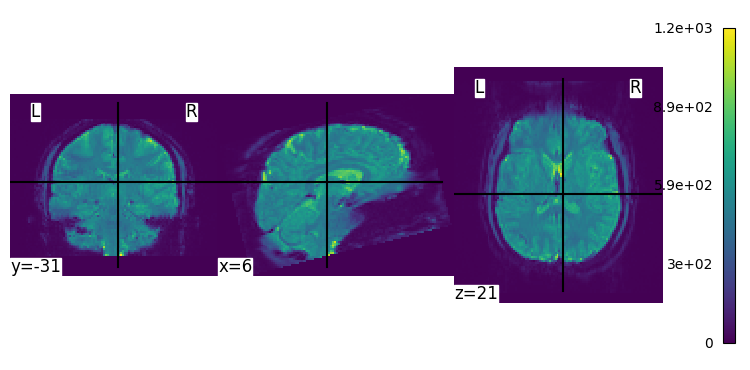

In [13]:
# plot 3D image
# plot_stat_map : plot cuts of an ROI/mask image at optional cut_coords (a tuple of floats or int)
#plotting.plot_stat_map(first_img, bg_img=None)

# plotting.plot_img : plot cuts of a given image at optional cut_coords (MNI coordinates of the point where the cut is performed), return an output_file
plotting.plot_img(first_img, colorbar=True) # Warning : the img is not computed in the MNI space ?

# Compute brain graph 
 Construct connectivity matrix and graph (node feature + adjacency matrix )

Register the data to an atlas that enables extration of time series ??

In [5]:
# Extract the time series
from nilearn.input_data import NiftiMapsMasker # transform nifti objects to time series using a probabilistic atlas

masker = NiftiMapsMasker(
    maps_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)
masker.fit(img_filename[1])
time_series = masker.transform(img_filename[1])
print(f"time series shape (T, N) : {time_series.shape}")

c:\Users\INES\Documents\3A_MVA\ML_for_TS\TimeSeries-GraphSignalProcessing\.venv\lib\site-packages\nilearn\input_data\__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


[NiftiMapsMasker.fit] loading regions from None
Resampling maps
________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x000001823B671348>, interpolation='continuous', target_shape=(106, 106, 69), target_affine=array([[  -2.      ,    0.      ,   -0.      ,  107.      ],
       [  -0.      ,    1.940591,   -0.483844, -108.460083],
       [   0.      ,    0.483844,    1.940591,  -74.139984],
       [   0.      ,    0.      ,    0.      ,    1.      ]]))


c:\Users\INES\Documents\3A_MVA\ML_for_TS\TimeSeries-GraphSignalProcessing\.venv\lib\site-packages\nilearn\_utils\cache_mixin.py:242: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  "memory_level is currently set to 0 but "


_____________________________________________________resample_img - 9.4s, 0.2min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract('__data\\sub-CSI1_ses-01_task-5000scenes_run-01_bold.nii.gz', <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x000001823BA7C288>, 
{ 'allow_overlap': True,
  'clean_kwargs': {},
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'keep_masked_maps': True,
  'low_pass': None,
  'maps_img': '__data\\msdl_atlas\\MSDL_rois\\msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': 'zscore_sample',
  'standardize_confounds': 'zscore_sample',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache\joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transfo

c:\Users\INES\Documents\3A_MVA\ML_for_TS\TimeSeries-GraphSignalProcessing\.venv\lib\site-packages\nilearn\maskers\nifti_maps_masker.py:604: UserWarning: Persisting input arguments took 0.83s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  verbose=self.verbose,


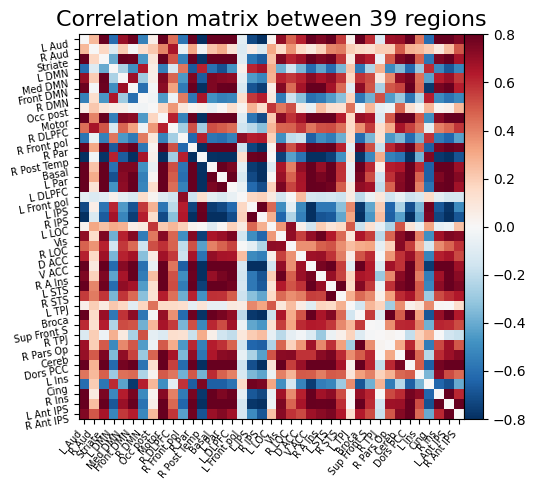

In [6]:
# Build and display a correlation matrix

correlation_measure = ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample",
)
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

title = f'Correlation matrix between {correlation_matrix.shape[0]} regions'
# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(
    correlation_matrix, labels=labels, colorbar=True, vmax=0.8, vmin=-0.8, title=title
)

In [17]:
print(f'correlataion matrix shape : {correlation_matrix.shape}')

correlataion matrix shape : (39, 39)


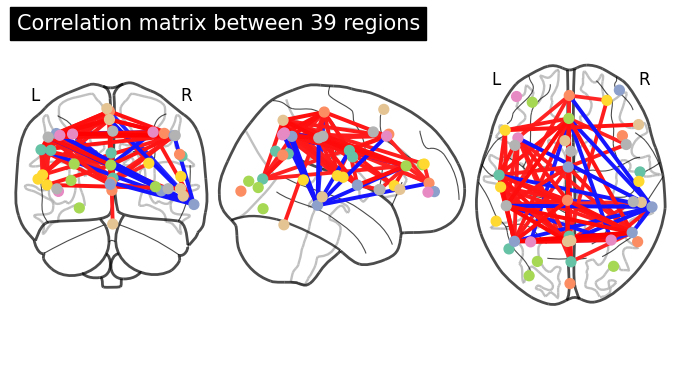

In [53]:
coords = atlas.region_coords

# We threshold to keep only the 20% of edges with the highest value
# because the graph is very dense
plotting.plot_connectome(
    correlation_matrix, coords, edge_threshold="90%", colorbar=False, title=title
)

plotting.show()

In [45]:
# Graph signal : 
signal = time_series.T
print(f'signal shape : {signal.shape}')

signal shape : (39, 194)


In [13]:
percentile = 80
threshold = np.percentile(np.abs(correlation_matrix), percentile)
print(f'threshold : {threshold}')
result_matrix = np.where(np.abs(correlation_matrix) > threshold, correlation_matrix, 0)
print(f"result shape : {result_matrix.shape}")

threshold : 0.7344847617016607
result shape : (39, 39)


In [16]:
A = (result_matrix != 0).astype(int)
np.fill_diagonal(A, 0)
print(f"A shape : {A.shape}")
G = graphs.Graph(A)

A shape : (39, 39)


In [95]:
nb_regions = G.N

G.compute_fourier_basis() # recompute=True
print(f'Graph eigenvalues : {G.e.shape}')
print(f'Graph eigenvectors : {G.U.shape}')

Graph eigenvalues : (39,)
Graph eigenvectors : (39, 39)


In [97]:
from functools import partial

# select n lowest frequencies
n = 10
sorted_eigenvalues = np.sort(G.e)
low_threshold_eigenvalue = sorted_eigenvalues[15]
high_threshold_eigenvalue = sorted_eigenvalues[-n]

print(f'low threshold eigenvalue : {low_threshold_eigenvalue}')
print(f'high threshold eigenvalue : {high_threshold_eigenvalue}')

def low_pass_g(x, threshold=0.1):
    return (x < threshold) * 1

def high_pass_g(x, threshold=0.1):
    return (x > threshold) * 1

def g(x, tau=1):
    return 1. / (1. + tau * x)
g = filters.Filter(G, g)
al_g = partial(low_pass_g, threshold=low_threshold_eigenvalue)
li_g = partial(high_pass_g, threshold=high_threshold_eigenvalue)


low threshold eigenvalue : 0.9062869564634821
high threshold eigenvalue : 16.42275184726981


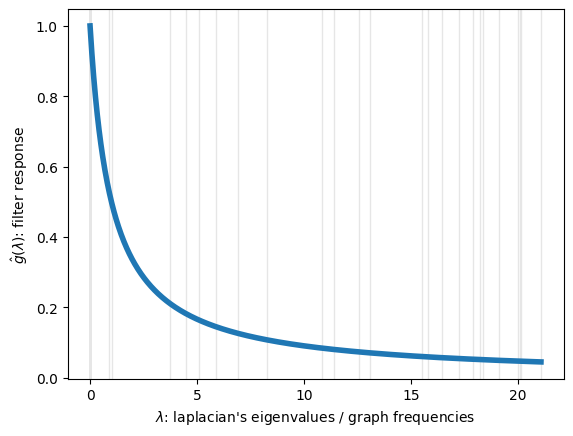

In [98]:
fig, ax = plt.subplots()
g.plot(plot_eigenvalues=True, ax=ax)

In [99]:
al_g = filters.Filter(G, al_g)
li_g = filters.Filter(G, li_g)

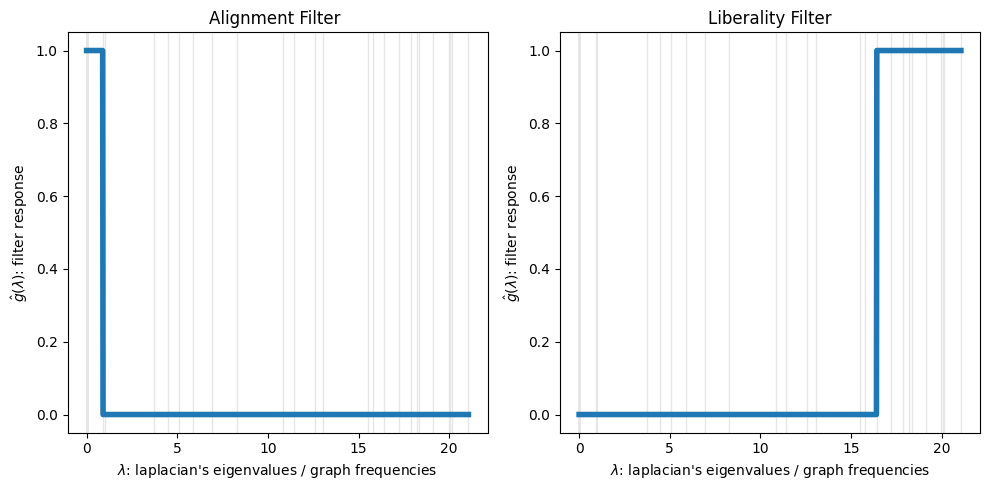

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
al_g.plot(plot_eigenvalues=True, ax=ax[0])
_ = ax[0].set_title('Alignment Filter ')

li_g.plot(plot_eigenvalues=True, ax=ax[1])
_ = ax[1].set_title('Liberality Filter')

fig.tight_layout()


# Filtering 

In the studied article, they perform graph signal filtering with two different filtering matrices 

$\psi_{Al}$ : low pass filtering for alignment; so that $Y_{\phi_{Al}} = V\psi_{Al}V^TX$ is the transformed functional data in which only the then lowest frequency modes are expressed 

$\psi_{Li}$ : high-pass filtering; for liberality, only the ten highest frequency modes 
to derive a subject-specific alignment and liberality concentration, they compute the norms of the filtered signal, averaged across all temporal samples of a given subject.

In [101]:
al_filtered_signal = al_g.filter(signal)
li_filtered_signal = li_g.filter(signal)
print(f'low pass filtered signal shape : {al_filtered_signal.shape}')
print(f'high pass filtered signal shape : {li_filtered_signal.shape}')

low pass filtered signal shape : (39, 194)
high pass filtered signal shape : (39, 194)


In [102]:
coords = np.array(coords)
print(coords[:, :2].shape)
G.set_coordinates(coords)

(39, 2)


In [58]:
signal[:, 0].shape

(39,)

In [105]:
# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# G.plot_signal(signal[:, 0], vertex_size=30, ax=ax)
# ax.set_axis_off()

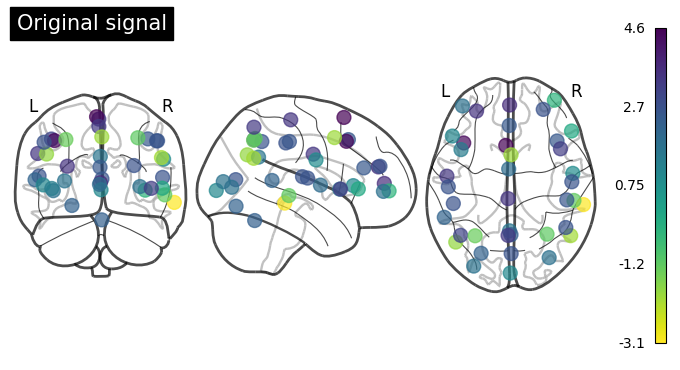

In [103]:
plotting.plot_markers(signal[:, 0], coords, title='Original signal')
plotting.show()

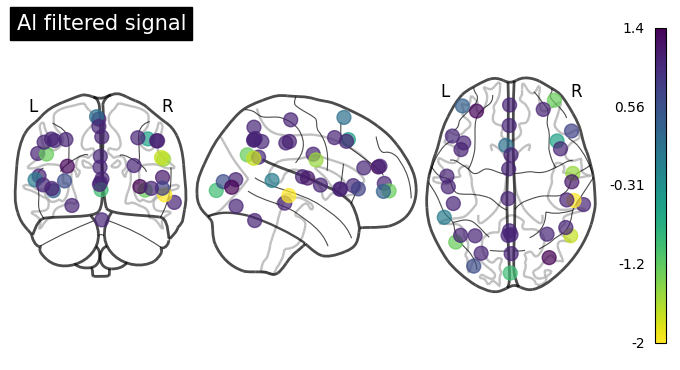

In [108]:
plotting.plot_markers(al_filtered_signal[:, 2], coords, title='Al filtered signal')
plotting.show()

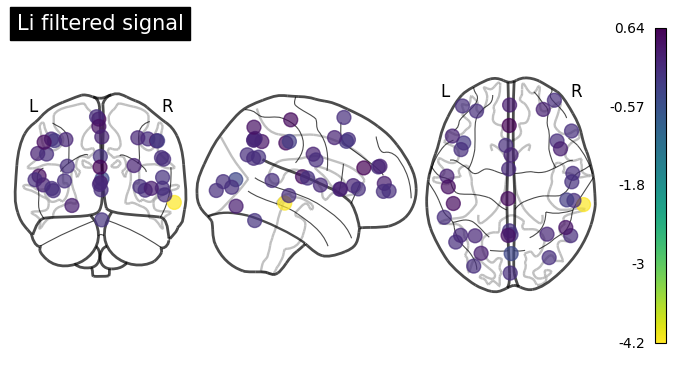

In [107]:
plotting.plot_markers(li_filtered_signal[:, 2], coords, title='Li filtered signal')
plotting.show()

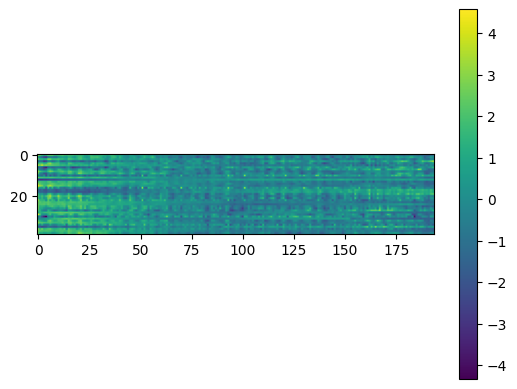

In [88]:
plt.imshow(signal)
plt.colorbar()

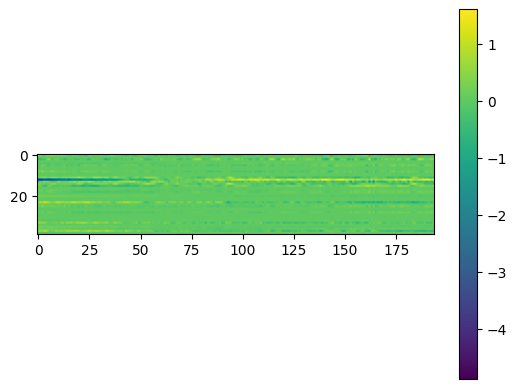

In [89]:
plt.imshow(li_filtered_signal)
plt.colorbar()